In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from arch.bootstrap import IIDBootstrap

In [35]:
data = pd.read_csv('../data/sotnikov.ad_hw3.csv', header=None)

In [36]:
data.head()

,0
0,0.383465
1,-0.402293
2,0.310915
3,-1.307309
4,-1.189256


In [56]:
x = data[0].to_numpy()

In [57]:
print(x)

[ 0.38346475 -0.40229282  0.31091491 -1.30730864 -1.18925623 -0.22438231
  0.94217784 -0.45451957  0.08657292  0.37057922  0.37258878  0.65050363
 -0.97947756 -0.43546935  0.13198677 -0.09513337 -0.10278395 -0.39158604
  1.08985565  0.74926416]


In [39]:
x = [y for a in x for y in a]

In [40]:
x

[0.38346475318355216,
 -0.40229282067975514,
 0.31091491101965674,
 -1.3073086418345665,
 -1.1892562347613058,
 -0.22438230953638544,
 0.9421778361330015,
 -0.4545195748846998,
 0.08657292483776899,
 0.37057921636919205,
 0.37258878210043517,
 0.6505036299822083,
 -0.9794775590305184,
 -0.43546934629359285,
 0.13198676549620814,
 -0.0951333693782998,
 -0.10278394724343681,
 -0.39158603653767654,
 1.0898556478756904,
 0.7492641580595297]

In [41]:
len(x)

20

#### 1) Применим ли t-критерий для проверки равенства среднего нулю для данной выборки?

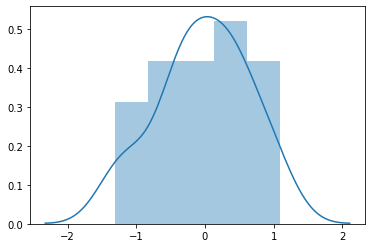

In [60]:
sns.distplot(x)

In [61]:
print('p-value = {:.2f}'.format(st.shapiro(x)[1]))

p-value = 0.73


Данные гипотезе о нормальности распределения не противоречат. Значит, t-критерий применим.

#### 2) p-value для критерия Уилкоксона (m0=0)

In [62]:
st.wilcoxon(x)[1].round(2)

0.79

#### 3) p-value для критерия знаков (m0=0)

In [63]:
from statsmodels.stats.descriptivestats import sign_test
sign_test(x, mu0=0)

(0.0, 1.0)

#### 4) Рассмотрим перестановочный критерий для среднего. Сколько перестановок возможно для данной выборки?

#### 5) Рассмотрим перестановочный критерий для проверки среднего (m0=0.5). Для какого количества перестановок статистика T будет иметь значение меньшее или равное статистике для оригинальной выборки?

#### 6) Левая граница доверительного интервала для среднего выборки 

In [59]:
bs = IIDBootstrap(x)
print(bs.conf_int(np.mean, 100000, method='bca'))

[[-0.32059756]
 [ 0.24739933]]


#### 7) Правая граница доверительного интервала для среднего выборки

In [58]:
bs = IIDBootstrap(x)
print(bs.conf_int(np.mean, 100000, method='basic'))

[[-0.32251379]
 [ 0.2495234 ]]
